# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Coleta de Dados

In [58]:
# Carregando base de treino e de teste
df_train = pd.read_csv('train.csv')
print(f"df_train: Linhas [{df_train.shape[0]}] | Colunas [{df_train.shape[0]}]")
df_test = pd.read_csv('test.csv')
print(f"df_test: Linhas [{df_test.shape[0]}] | [Colunas {df_test.shape[0]}]")
# Criando um novo DataFrame com a união dos dois anteriores e sem a variáavel resposta para fazer limpeza dos dados e a engenharia de atributos
df_concat = pd.concat([df_train.drop('Survived',axis=1),df_test], axis=0).reset_index(drop=True)
print(f"df_concat: Linhas [{df_concat.shape[0]}] | [Colunas {df_concat.shape[0]}]")

df_train: Linhas [891] | Colunas [891]
df_test: Linhas [418] | [Colunas 418]
df_concat: Linhas [1309] | [Colunas 1309]


In [40]:
# Visualização das primeiras linhas
df_concat.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# Verificando o tipo das colunas
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [59]:
df_concat.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# Preparação e Limpeza dos Dados

## Tratando valores nulos

In [55]:
# Quantidade de valores nulos por coluna
df_concat.isnull().sum().sort_values(ascending=False).head()

Cabin          1014
Age             263
Embarked          2
Fare              1
PassengerId       0
dtype: int64

In [56]:
# Porcentagem de valores nulos por coluna
df_concat.isna().mean().sort_values(ascending=False).head() * 100

Cabin          77.463713
Age            20.091673
Embarked        0.152788
Fare            0.076394
PassengerId     0.000000
dtype: float64

### Cabin - 1014 (77,46%) linhas nulas

In [6]:
# Como a colunas 'Cabiin' tem mais de 75% das linhas não preenchidas,vou optar por retirar da análise
df_concat.drop('Cabin',axis=1,inplace=True)

### Age - 263 (20,09%) linhas nulas

In [ ]:
# Por ter muitas linhas com valores nulos vou optar por fazer a imputação simples, buscando correlacionar o valor da idade com outras variáveis categóricas

<Axes: xlabel='Age', ylabel='Count'>

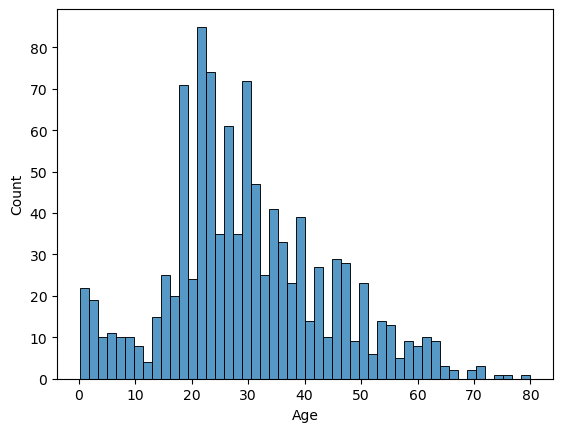

In [64]:
# A distribuição das idade está com assimetria a esquerda e com outliers, então vou usar mediana para imputar
sns.histplot(data=df_concat,x='Age', bins=50)

Text(0, 0.5, 'Idade')

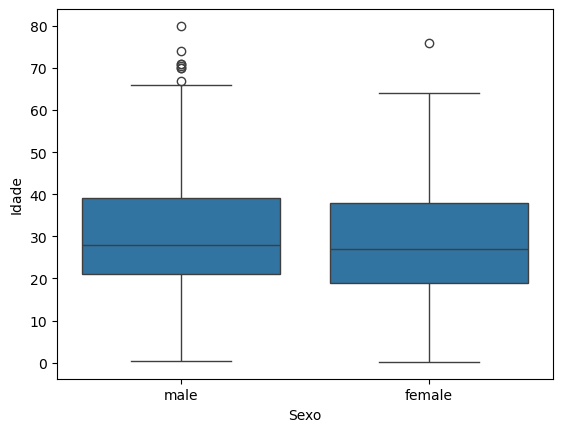

In [7]:
# Verificando distribuição das idades por sexo
sns.boxplot(data=df_concat,x='Sex', y='Age')
plt.xlabel('Sexo')
plt.ylabel('Idade')

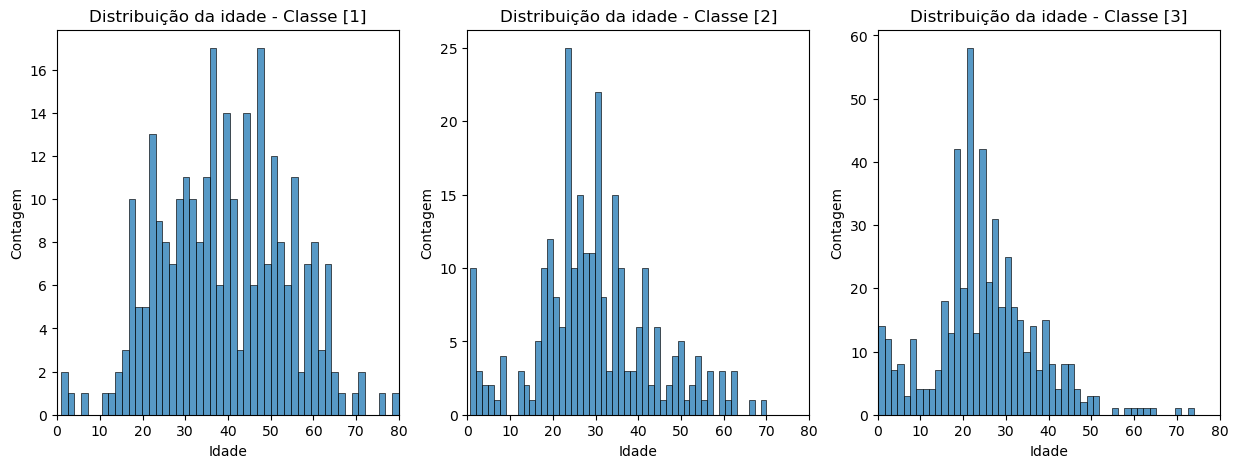

In [8]:
# A variável Pclass me ajuda a definir o melhor valor para a imputação, vemos que para primeira classe temos maior número de pessoas mais velhor, diferente das demais classes
classes = sorted(df_concat['Pclass'].unique())
fig, axes = plt.subplots(1, len(classes), figsize=(15,5))
for i, classe in enumerate(classes):
    sns.histplot(df_concat[df_concat['Pclass'] == classe]['Age'], bins=50, ax=axes[i])
    axes[i].set_title(f"Distribuição da idade - Classe [{classe}]")
    axes[i].set_xlabel("Idade")
    axes[i].set_ylabel("Contagem")
    axes[i].set_xlim(0,80)
    #axes[i].set_ylim(0,60)
plt.show()

In [11]:
# Mediana da idade agrupado por classe e sexo
df_concat.groupby(['Pclass','Sex'])['Age'].median().reset_index()

,Pclass,Sex,Age
0,1,female,36.0
1,1,male,42.0
2,2,female,28.0
3,2,male,29.5
4,3,female,22.0
5,3,male,25.0


In [12]:
# Imputação com a mediana
df_concat['Age'] = df_concat['Age'].fillna(df_concat.groupby(['Pclass','Sex'])['Age'].transform('median'))

### Embarked - 2 (0,15%) linhas nulas

In [65]:
# Como são apenas dois valores nulos vou preencher com a moda
print(f"Moda: {df_concat['Embarked'].mode()[0]}")

Moda: S


In [13]:
# Imputando com a moda
df_concat['Embarked'] = df_concat['Embarked'].fillna(df_concat['Embarked'].mode()[0])

### Fare - 1 (0,07%) linha nula

In [14]:
# Calculando a mediana agrupada por classe e local da embarcação, dependendo de onde você embarca a trajeto é menor e o valor da passagem mais barata
df_concat.groupby(['Pclass','Embarked'])['Fare'].median().reset_index()

,Pclass,Embarked,Fare
0,1,C,76.7292
1,1,Q,90.0000
2,1,S,52.0000
3,2,C,15.3146
4,2,Q,12.3500
5,2,S,15.3750
6,3,C,7.8958
7,3,Q,7.7500
8,3,S,8.0500


In [15]:
# Imputando com a mediana
df_concat['Fare'] = df_concat['Fare'].fillna(df_concat.groupby(['Pclass','Embarked'])['Fare'].transform('median'))

## Engenharia de atributos

In [21]:
# Coluna para contar familiares a bordo
df_concat['FamilyCount'] = df_concat['SibSp'] + df_concat['Parch']

In [22]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,Title,FamilyCount
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Owen Harris,Mr,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Laina,Miss,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Jacques Heath (Lily May Peel),Mrs,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,William Henry,Mr,0


In [66]:
# Explorando a coluna tickets vemos que para um mesmo identiicador tem mais de uma referência
df_concat['Ticket'].value_counts().head()

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
Name: count, dtype: int64

In [25]:
# Quando olhamos o que tem mais ocorrência vemos que todas as pessoas pertencem a mesma família, logo o campo Fare do ticket que tem mais de uma ocorrência não mostra o valor pago por pessoa, e sim o total 
df[df['Ticket']=='CA. 2343']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,Title,FamilyCount
159,160,3,"Sage, Master. Thomas Henry",male,25.0,8,2,CA. 2343,69.55,S,Sage,Thomas Henry,Master,10
180,181,3,"Sage, Miss. Constance Gladys",female,22.0,8,2,CA. 2343,69.55,S,Sage,Constance Gladys,Miss,10
201,202,3,"Sage, Mr. Frederick",male,25.0,8,2,CA. 2343,69.55,S,Sage,Frederick,Mr,10
324,325,3,"Sage, Mr. George John Jr",male,25.0,8,2,CA. 2343,69.55,S,Sage,George John Jr,Mr,10
792,793,3,"Sage, Miss. Stella Anna",female,22.0,8,2,CA. 2343,69.55,S,Sage,Stella Anna,Miss,10
846,847,3,"Sage, Mr. Douglas Bullen",male,25.0,8,2,CA. 2343,69.55,S,Sage,Douglas Bullen,Mr,10
863,864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,22.0,8,2,CA. 2343,69.55,S,Sage,"Dorothy Edith ""Dolly""",Miss,10
1079,1080,3,"Sage, Miss. Ada",female,22.0,8,2,CA. 2343,69.55,S,Sage,Ada,Miss,10
1233,1234,3,"Sage, Mr. John George",male,25.0,1,9,CA. 2343,69.55,S,Sage,John George,Mr,10
1251,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,S,Sage,William Henry,Master,10


In [67]:
# Para validar eu agrupei por classe e local de embarque para verificar a mediana, para a classe 3 e Embarque C do exemplo acima, temos Fare mediano de 7.89
# Quando dividimos o Fare(69.55) pela quantidade de pessoas(11), temos 6.32, o que é um valor justificavel para o desconto de uma compra em conjunto
df_concat.groupby(['Pclass','Embarked'])['Fare'].median().reset_index()

6.322727272727272


,Pclass,Embarked,Fare
0,1,C,76.7292
1,1,Q,90.0000
2,1,S,52.0000
3,2,C,15.3146
4,2,Q,12.3500
5,2,S,15.3750
6,3,C,7.8958
7,3,Q,7.7500
8,3,S,8.0500


In [27]:
# Coluna para a quantidade de pessoas com o mesmo Ticket
df['GroupSizeTicket'] = df.groupby('Ticket')['Ticket'].transform('count')
# Calculo do valor do ticket por pessoa
df['FarePerPerson'] = df['Fare'] / df['GroupSizeTicket']

In [28]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,Title,FamilyCount,GroupSizeTicket,FarePerPerson
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Owen Harris,Mr,1,1,7.25000
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs,1,2,35.64165
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Laina,Miss,0,1,7.92500
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Jacques Heath (Lily May Peel),Mrs,1,2,26.55000
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,William Henry,Mr,0,1,8.05000


# Análise Exploratória